<a href="https://colab.research.google.com/github/hamagami/anomaly-detection/blob/main/timm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## timmによる学習済モデルの入手と画像の特徴抽出

timmは学習済み画像認識・分類のモデルライブラリです。多くの優れた学習済モデルが入手できます。ここでは学習済モデルを画像の特徴抽出器として使う方法を示します

timm　のインストールです。PyCaretと同様にGoogleDrive上に展開すればその都度インストールする手間はかかりません

In [21]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.2 MB/s eta 0:00:00


In [22]:
import timm
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import timm
from PIL import Image
import matplotlib.pyplot as plt
import glob
import random

In [67]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def pp(img,device):
  return preprocess(img).unsqueeze(0).to(device)

In [50]:
!wget "https://www.dropbox.com/scl/fi/nz1jejph0twv89ftptnhl/images.zip?rlkey=v0dx7imjaor9rgpgbz4i0q9ae&dl=0"

!unzip -d . "images.zip?rlkey=v0dx7imjaor9rgpgbz4i0q9ae&dl=0"

--2023-11-23 11:08:20--  https://www.dropbox.com/scl/fi/nz1jejph0twv89ftptnhl/images.zip?rlkey=v0dx7imjaor9rgpgbz4i0q9ae&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5120e33212284f63b6472d578d.dl.dropboxusercontent.com/cd/0/inline/CIEe_9K9coi3BvBaShiJasaNDTsewHjgdrDGc8QkWMY3ZUNqZ-ExBCJXGYYm2vyo1xOGHDXgnMC5KHAzqYHdiFT17DJANvHvJsU4E1usz8wta_jc3WcQvUiadQIeGxGOBI4/file# [following]
--2023-11-23 11:08:21--  https://uc5120e33212284f63b6472d578d.dl.dropboxusercontent.com/cd/0/inline/CIEe_9K9coi3BvBaShiJasaNDTsewHjgdrDGc8QkWMY3ZUNqZ-ExBCJXGYYm2vyo1xOGHDXgnMC5KHAzqYHdiFT17DJANvHvJsU4E1usz8wta_jc3WcQvUiadQIeGxGOBI4/file
Resolving uc5120e33212284f63b6472d578d.dl.dropboxusercontent.com (uc5120e33212284f63b6472d578d.dl.dropboxusercontent.com)... 162.125.8.15, 2620:100:6018:15::a27d:30f
Connecting to uc51

In [55]:
fns= glob.glob("/content/images/*.jpg")

['/content/images/img_00813.jpg',
 '/content/images/img_00010.jpg',
 '/content/images/img_00826.jpg',
 '/content/images/img_00710.jpg',
 '/content/images/img_00824.jpg',
 '/content/images/img_00510.jpg',
 '/content/images/img_00906.jpg',
 '/content/images/img_01007.jpg',
 '/content/images/img_00414.jpg',
 '/content/images/img_00602.jpg',
 '/content/images/img_00417.jpg',
 '/content/images/img_00501.jpg',
 '/content/images/img_00105.jpg',
 '/content/images/img_01000.jpg',
 '/content/images/img_00014.jpg',
 '/content/images/img_00113.jpg',
 '/content/images/img_00304.jpg',
 '/content/images/img_00203.jpg',
 '/content/images/img_00605.jpg',
 '/content/images/img_00821.jpg',
 '/content/images/img_00713.jpg',
 '/content/images/img_00211.jpg',
 '/content/images/img_00308.jpg',
 '/content/images/img_00003.jpg',
 '/content/images/img_00829.jpg',
 '/content/images/img_00017.jpg',
 '/content/images/img_01003.jpg',
 '/content/images/img_00303.jpg',
 '/content/images/img_00903.jpg',
 '/content/ima

In [85]:
# 学習済みモデルの名前とクラス数
model_name = 'resnet50'
#model_name ='vgg16'

# GPUが利用可能な場合は、モデルとデータをGPUに移動
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 学習済みモデルの読み込み
model = timm.create_model(model_name, pretrained=True)#,num_classes = 0)
model.to(device)
model.eval()



# モデルの最終層を除いた特徴を取得
#features1 = output1.squeeze().cpu().numpy()
#features2 = output2.squeeze().cpu().numpy()
#features3 = output3.squeeze().cpu().numpy()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [95]:
with torch.no_grad():
    features1 = model(pp(image1,device)).squeeze().cpu().numpy()


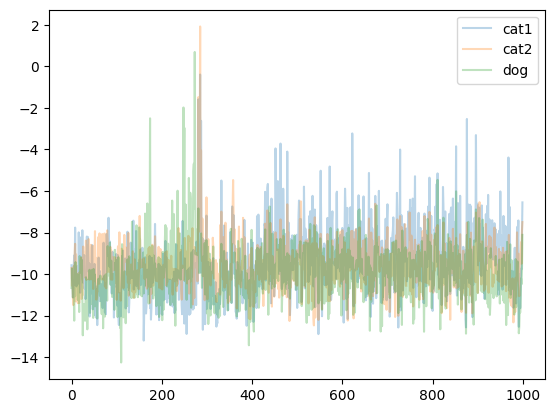

In [96]:
plt.plot(fratur1,alpha=0.3,label="cat1")
plt.plot(fratur2,alpha=0.3,label="cat2")
plt.plot(fratur3,alpha=0.3,label="dog")
plt.legend()
plt.show()

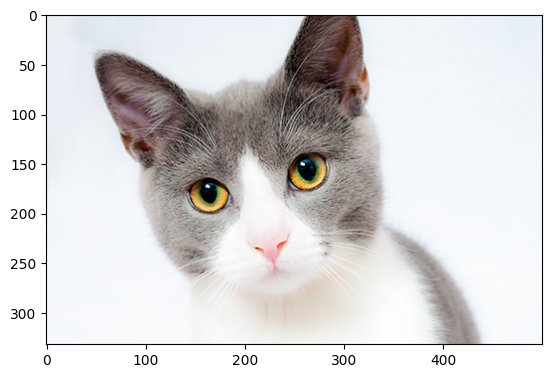

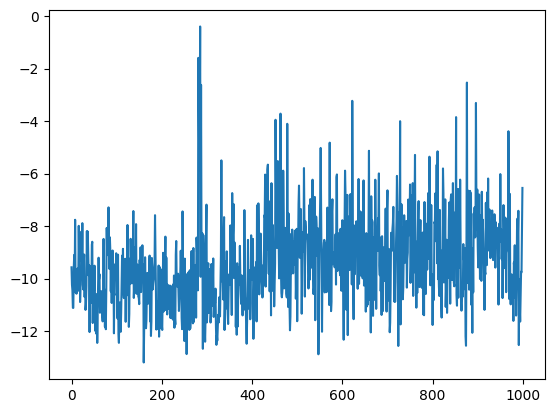

In [62]:
plt.imshow(image1)
plt.show()
plt.plot(features1)

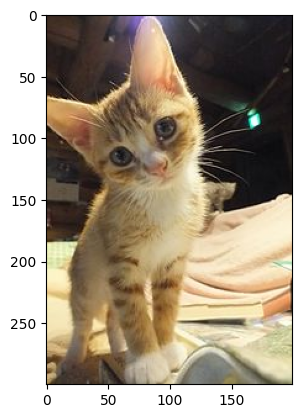

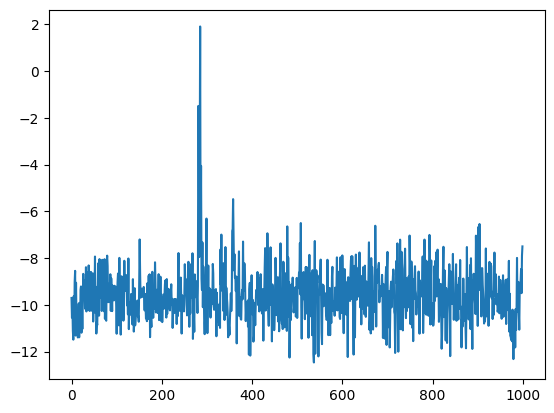

In [35]:
plt.imshow(image2)
plt.show()
plt.plot(features2)

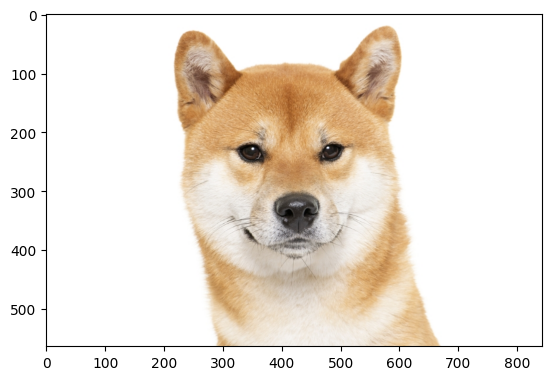

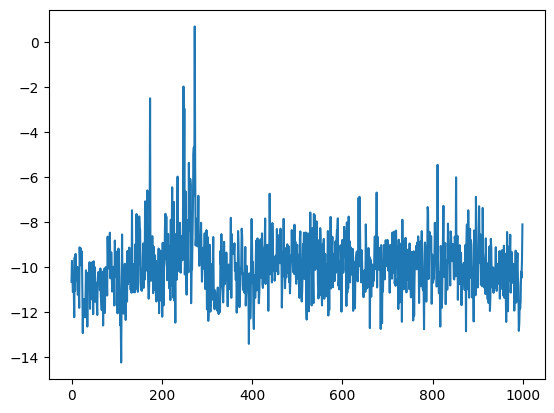

In [36]:
plt.imshow(image3)
plt.show()
plt.plot(features3)

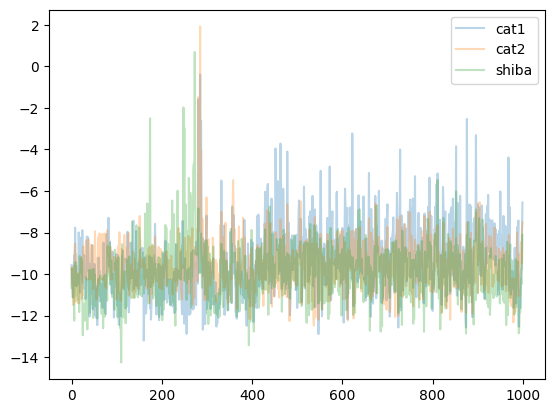

In [40]:
plt.plot(features1,alpha=0.3,label="cat1")
plt.plot(features2,alpha=0.3,label="cat2")
plt.plot(features3,alpha=0.3,label="shiba")
plt.legend()
plt.show()

In [ ]:
def expand2square(pil_img, background_color):
    width, height = pil_img.size
    if width == height:
        return pil_img
    elif width > height:
        result = Image.new(pil_img.mode, (width, width), background_color)
        result.paste(pil_img, (0, (width - height) // 2))
        return result
    else:
        result = Image.new(pil_img.mode, (height, height), background_color)
        result.paste(pil_img, ((height - width) // 2, 0))
        return result

In [ ]:
#Download the guitar images. It'll take a while.
!wget https://dl.dropbox.com/s/dmjzsrqa9s22joi/imgs.zip
!unzip -d . imgs.zip

--2023-11-23 07:47:43--  https://dl.dropbox.com/s/dmjzsrqa9s22joi/imgs.zip
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.2.15, 2620:100:6022:15::a27d:420f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.2.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/dmjzsrqa9s22joi/imgs.zip [following]
--2023-11-23 07:47:43--  https://dl.dropboxusercontent.com/s/dmjzsrqa9s22joi/imgs.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6022:15::a27d:420f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.2.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25799813 (25M) [application/zip]
Saving to: ‘imgs.zip’

imgs.zip            100%[===================>]  24.60M  92.3MB/s    in 0.3s    

2023-11-23 07:47:45 (92.3 MB/s) - ‘imgs.zip’ saved [25799813/25799813]

Archive:  imgs.zip
  inflating: ./imgs/guitar/1.yamaha_cs40jgg_la.jp

In [ ]:
def feature_extraction(model, img_path, image_size=224):
    im=load_img(f)
    img = expand2square(im, (128, 128, 128)).resize((image_size, image_size))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)  # add a dimention of samples
    x = preprocess_input(x)  # RGB 2 BGR and zero-centering by mean pixel based on the position of channels

    feat = model.predict(x)  # Get image features
    feat = feat.flatten()  # Convert 3-dimentional matrix to (1, n) array

    return feat

In [ ]:
model = timm.create_model(model_name, pretrained=True)
model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [ ]:
files = glob.glob("./imgs/guitar/*")
# test
for f in random.sample(files, 3):
  print(f)
  ret= feature_extraction(model, f, 224)
  plt.imshow(mpimg.imread(f))
  plt.plot(ret*10)
  plt.show()

./imgs/guitar/extened-35_0_1338.jpg


NameError: ignored